In [1]:
import sqlite3
import pandas
con = sqlite3.connect('coal.db')
labels = pandas.read_sql("select orispl_code, unitid from data group by orispl_code, unitid", con)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
names = {}
for i, row in labels.iterrows():
    key = (row['orispl_code'], row['unitid'])
    for year in range(2001, 2017):
        frame = pandas.read_csv('cf/' + str(row['orispl_code']) + '_' + row['unitid'] + '_' + str(year) + '.csv')
        if len(frame.name) is 0: continue
        name = frame.name[0]
        names[key] = name
#         plt.gcf().clear()
#         data = frame.capacity_factor
#         plt.hist(data, bins=np.linspace(0, 1, 10))
#         plt.xlabel('Capacity factor - hourly generation / max hourly generation')
#         plt.ylabel('Frequency')
#         plt.title('Capacity Factors at ' + name + ', unit ' + row['unitid'] + ' in ' + str(year))
#         plt.savefig('cf/' + str(row['orispl_code']) + '_' + row['unitid'] + '_' + str(year) + '.png')

In [129]:
data = {}
for i, row in labels.iterrows():
    key = (names[(row['orispl_code'], row['unitid'])], row['unitid'])
    data[key] = {}
    for year in range(2001, 2017):
        data[key][year] = {}
        frame = pandas.read_csv('cf/' + str(row['orispl_code']) + '_' + row['unitid'] + '_' + str(year) + '.csv')
        col = frame.capacity_factor
        dates = frame.op_date.unique()
        for date in dates:
            print date
            col = col[(frame.op_date == date)]
            if len(col) is 0: continue
            data[key][year] = (np.average(col), np.std(col), np.std(col/np.average(col)), len(col), col)
            print col
            break
        break
    break
        # for distinct date in date column:
        # Get only the dates in that column! Revolutionary
#         if len(col) is 0: continue
#         col = col[(col != 0)] This line removes nonzero values from all columns
#         data[key][year] = (np.average(col), np.std(col), np.std(col/np.average(col)), len(col), col)

01-01-2001
0     0.754579
1     0.728938
2     0.721612
3     0.695971
4     0.717949
5     0.813187
6     0.802198
7     0.809524
8     0.820513
9     0.842491
10    0.816850
11    0.809524
12    0.787546
13    0.798535
14    0.791209
15    0.813187
16    0.791209
17    0.780220
18    0.769231
19    0.875458
20    0.813187
21    0.838828
22    0.857143
Name: capacity_factor, dtype: float64


In [120]:
import math
import scipy.stats as stats
def compare_years(year1, year2, alpha):
    ttests = []
    passes_t = []
    ftests = []
    passes_f = []
    for unit in data:
        disregard = False
        if year1 not in data[unit]:
            disregard = True
        if year2 not in data[unit]:
            disregard = True
        if disregard: continue
        
        min_year =  data[unit][year1]
        max_year = data[unit][year2]    

#         print(unit)
        
#         print "Mean from year " + str(year1) + ": " + str(min_year[0])
#         print "Std dev from year " + str(year1) + ": " + str(min_year[1])

#         print "Mean from year " + str(year2) + ": " + str(max_year[0])
#         print "Std dev from year " + str(year2) + ": " + str(max_year[1])
        
#         print "T-test result: " 
#         print stats.ttest_ind(max_year[4], min_year[4], equal_var=False)
        
        
#         print "Levene test result:"
#         print stats.levene(max_year[4], min_year[4])
        
  
#         plt.gcf().clear()
#         plt.hist(min_year[4], bins=np.linspace(0, 1, 20))
#         plt.xlabel('Capacity factor - hourly generation / max hourly generation')
#         plt.ylabel('Frequency')
#         plt.title('Capacity Factors at ' + str(unit) + ' in ' + str(year1))
#         plt.show()
#         plt.gcf().clear()
#         plt.hist(max_year[4], bins=np.linspace(0, 1, 20))
#         plt.xlabel('Capacity factor - hourly generation / max hourly generation')
#         plt.ylabel('Frequency')
#         plt.title('Capacity Factors at ' + str(unit) + ' in ' + str(year2))
#         plt.show()
#         break
        if math.isnan(stats.ttest_ind(max_year[4], min_year[4], equal_var=False).pvalue):
            continue
        passes_t.append(stats.ttest_ind(max_year[4], min_year[4], equal_var=False).pvalue >= alpha)
        ttests.append(stats.ttest_ind(max_year[4], min_year[4], equal_var=False).pvalue)
        passes_f.append(stats.levene(max_year[4], min_year[4]).pvalue >= alpha)
        ftests.append(stats.levene(max_year[4], min_year[4]).pvalue)
    print ttests    
        
    plt.gcf().clear()
    plt.hist(ttests, bins=np.linspace(0, 1, 20))
    plt.xlabel('P value from t test')
    plt.ylabel('Frequency')
    plt.title('P value from t test between years ' + str(year1) + " and " + str(year2))
    plt.show()
    
    plt.gcf().clear()
    plt.hist(passes_t)
    plt.title('P value from t test >= ' + str(alpha))
    plt.ylabel('Frequency')
    plt.xlabel('True (1) or False (0)')
    plt.show()
        
    plt.gcf().clear()
    plt.hist(ftests, bins=np.linspace(0, 1, 20))
    plt.xlabel('P value from f test')
    plt.ylabel('Frequency')
    plt.title('P value from f test between years ' + str(year1) + " and " + str(year2))
    plt.show()
        
    plt.gcf().clear()
    plt.hist(passes_f)
    plt.title('P value from f test >= ' + str(alpha))
    plt.ylabel('Frequency')
    plt.xlabel('True (1) or False (0)')
    plt.show()



('Arapahoe', u'3')
Mean from year 2001: 0.730387278789
Std dev from year 2001: 0.123900980586
Mean from year 2002: 0.708882431287
Std dev from year 2002: 0.121433692876
T-test result: 
Ttest_indResult(statistic=-11.098292306603906, pvalue=1.6259112261503345e-28)
Levene test result:
LeveneResult(statistic=43.621238161872391, pvalue=4.1100448301315142e-11)


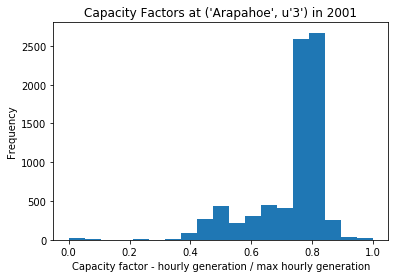

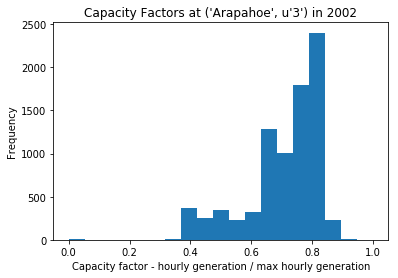

In [115]:
compare_years(2001, 2002, .05)

('Arapahoe', u'3')
Mean from year 2001: 0.650178082192
Std dev from year 2001: 0.256546016725
Mean from year 2002: 0.668340182648
Std dev from year 2002: 0.202481597973
T-test result: 
Ttest_indResult(statistic=5.200892930188231, pvalue=2.0068649381716303e-07)
Levene test result:
LeveneResult(statistic=82.035982173676999, pvalue=1.4740052575339292e-19)


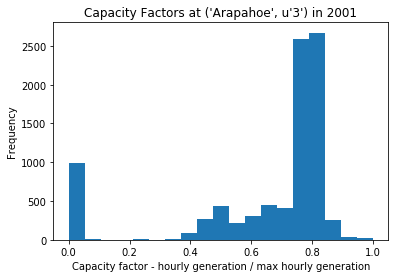

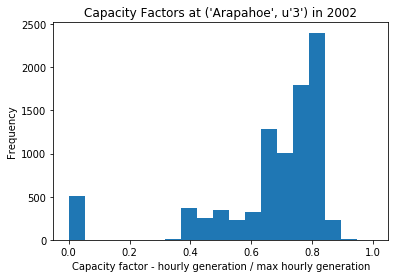

In [117]:
compare_years(2001, 2002, .05)

[2.0068649381716303e-07, 2.3777300758150957e-45, 7.7841041594214325e-21, 4.5907976229475414e-112, 1.5762437201161181e-06, 9.6231409229960378e-11, 2.4741943133718579e-160, 5.7271133141248011e-68, 9.9528954755720196e-73, 6.730488036626736e-250, 8.3109907805031951e-203, 0.0030780900240163058, 0.0, 3.1676858112627184e-146, 4.5765953536909039e-130, 3.9821784149737182e-15, 0.43473266314834991, 4.6066662451877269e-09, 7.3899291912415097e-185, 1.1452797740845956e-272, 4.0090794079992791e-229, 0.23205273370148602, 2.2436409605035221e-07, 2.2543380075640241e-114, 1.0282155011990654e-83, 5.5704680425023584e-109, 3.8125718667629098e-23, 1.1318739830421205e-49, 4.5780016430122826e-145, 3.5708295754746642e-28, 0.0, 8.6355733493534015e-14, 1.4675008610668558e-19, 0.092091891023841965, 1.1945313464105395e-130, 1.7499806555765858e-285, 1.5715920219968556e-22, 1.2334418384013102e-46, 2.3803667743162774e-05, 0.0058811958586158196, 1.2236444646442297e-195, 1.2985041279107786e-17, 2.9885588490774695e-53, 3

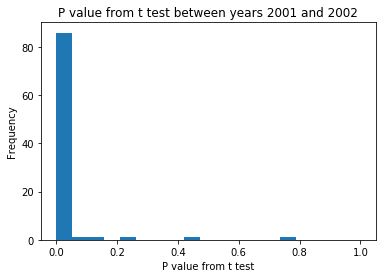

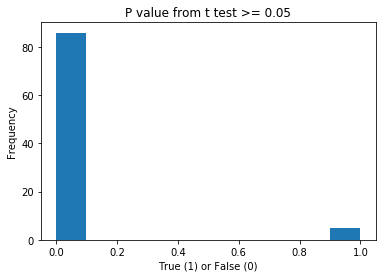

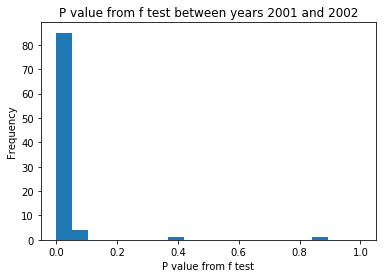

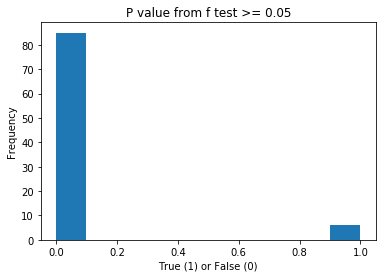

In [121]:
compare_years(2001, 2002, .05)